<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_9_(11_Feb)_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('Dataset 2.xlsx')

# Select the relevant features (independent variables) and the target (dependent variable)
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]  # Exclude non-numeric columns
y = data['Clicked on Ad']

# Standardizing the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Predict on the test data
y_pred = result.predict(X_test)

# You can evaluate the model performance (e.g., accuracy, confusion matrix, etc.) here if needed


Optimization terminated successfully.
         Current function value: 0.079178
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.8858
Time:                        07:12:32   Log-Likelihood:                -55.425
converged:                       True   LL-Null:                       -485.16
Covariance Type:            nonrobust   LLR p-value:                1.575e-183
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9958      0.433      4.614      0.000       1.148       2.844
x1            -3.0844      0

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('Dataset 2.xlsx')

# Select the relevant features (independent variables) and the target (dependent variable)
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]  # Excluding non-numeric columns
y = data['Clicked on Ad']

# Standardize the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Predict on the test data
y_pred = result.predict(X_test)

# You can evaluate the model performance (e.g., accuracy, confusion matrix, etc.) here if needed


Optimization terminated successfully.
         Current function value: 0.079178
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.8858
Time:                        07:13:50   Log-Likelihood:                -55.425
converged:                       True   LL-Null:                       -485.16
Covariance Type:            nonrobust   LLR p-value:                1.575e-183
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9958      0.433      4.614      0.000       1.148       2.844
x1            -3.0844      0

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert probabilities to binary outcomes (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(f'Confusion Matrix: \n{cm}')


Accuracy: 0.9633333333333334
Confusion Matrix: 
[[141   5]
 [  6 148]]


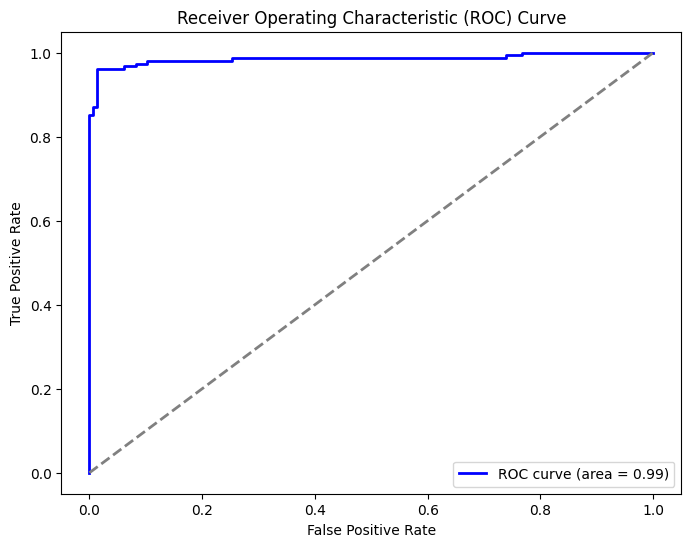

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


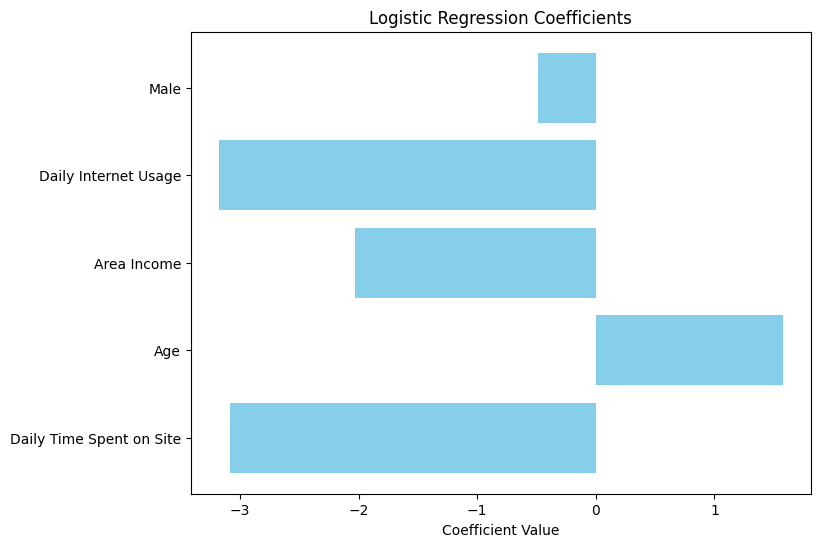

In [5]:
import numpy as np

# Get the model coefficients
coefficients = result.params[1:]  # Exclude constant

# Create a bar chart of coefficients
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()


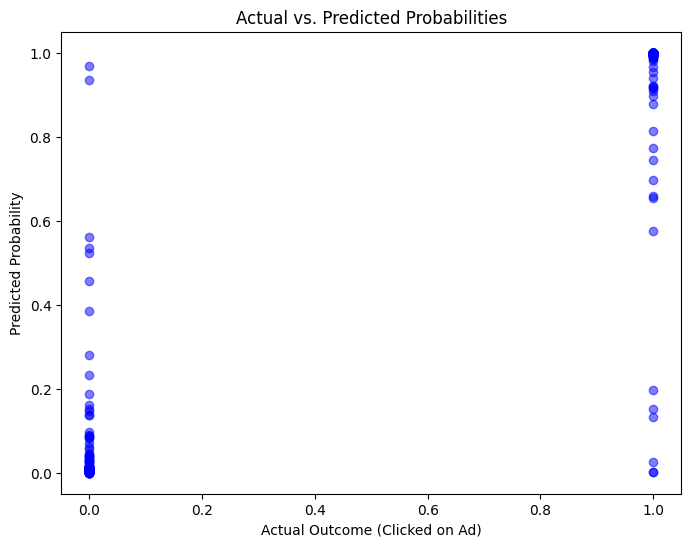

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Outcome (Clicked on Ad)')
plt.ylabel('Predicted Probability')
plt.title('Actual vs. Predicted Probabilities')
plt.show()


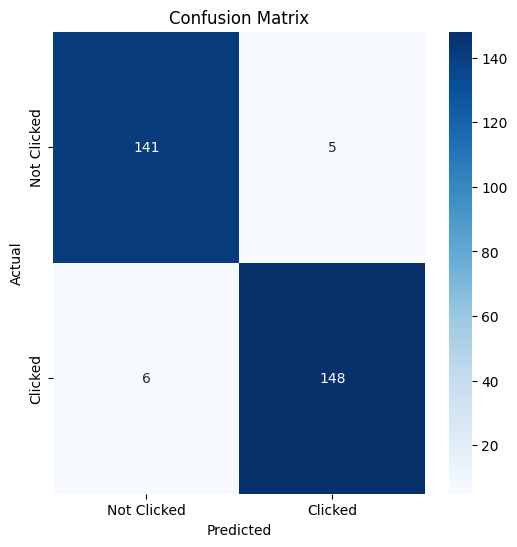

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Clicked", "Clicked"], yticklabels=["Not Clicked", "Clicked"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-8-cea1afafb819>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Category', y='Clicked on Ad', data=data, palette='viridis')


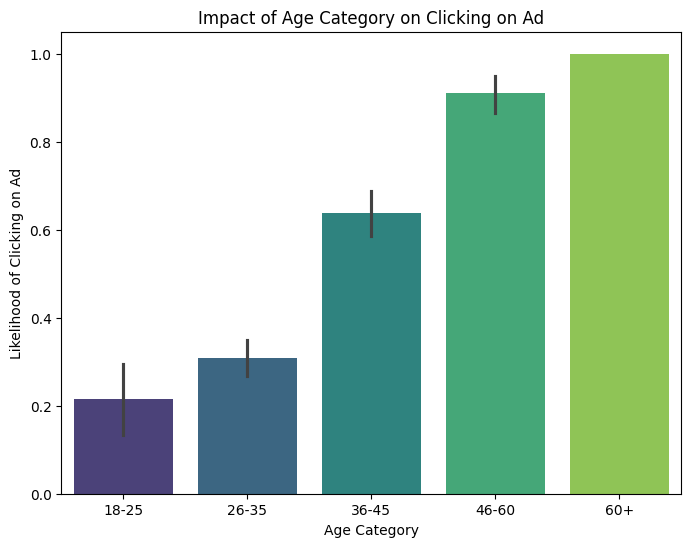

<ipython-input-8-cea1afafb819>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area Income Category', y='Clicked on Ad', data=data, palette='viridis')


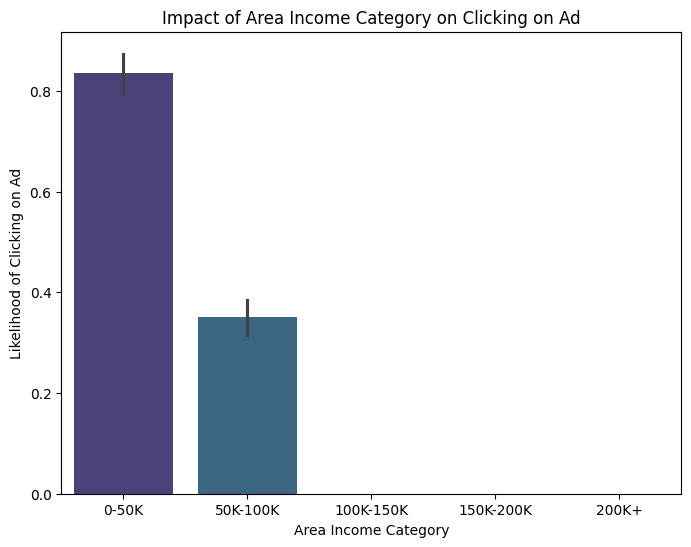

<ipython-input-8-cea1afafb819>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Daily Internet Usage Category', y='Clicked on Ad', data=data, palette='viridis')


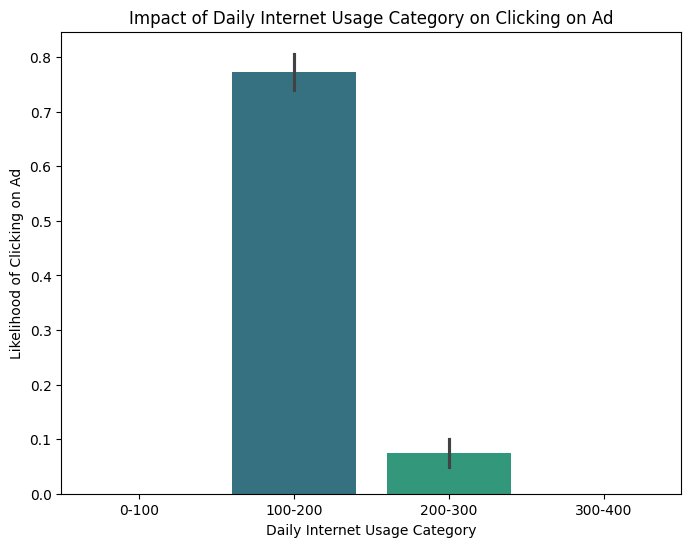

In [8]:
# Binning the continuous variables into categories
data['Age Category'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 60, 100], labels=['18-25', '26-35', '36-45', '46-60', '60+'])
data['Area Income Category'] = pd.cut(data['Area Income'], bins=[0, 50000, 100000, 150000, 200000, 300000], labels=['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+'])
data['Daily Internet Usage Category'] = pd.cut(data['Daily Internet Usage'], bins=[0, 100, 200, 300, 400], labels=['0-100', '100-200', '200-300', '300-400'])

# Now, visualize how each category impacts the likelihood of clicking the ad
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the effect of Age Category on Clicked on Ad
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Category', y='Clicked on Ad', data=data, palette='viridis')
plt.title('Impact of Age Category on Clicking on Ad')
plt.xlabel('Age Category')
plt.ylabel('Likelihood of Clicking on Ad')
plt.show()

# Visualize the effect of Area Income Category on Clicked on Ad
plt.figure(figsize=(8, 6))
sns.barplot(x='Area Income Category', y='Clicked on Ad', data=data, palette='viridis')
plt.title('Impact of Area Income Category on Clicking on Ad')
plt.xlabel('Area Income Category')
plt.ylabel('Likelihood of Clicking on Ad')
plt.show()

# Visualize the effect of Daily Internet Usage Category on Clicked on Ad
plt.figure(figsize=(8, 6))
sns.barplot(x='Daily Internet Usage Category', y='Clicked on Ad', data=data, palette='viridis')
plt.title('Impact of Daily Internet Usage Category on Clicking on Ad')
plt.xlabel('Daily Internet Usage Category')
plt.ylabel('Likelihood of Clicking on Ad')
plt.show()


<ipython-input-9-8328d200fcae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


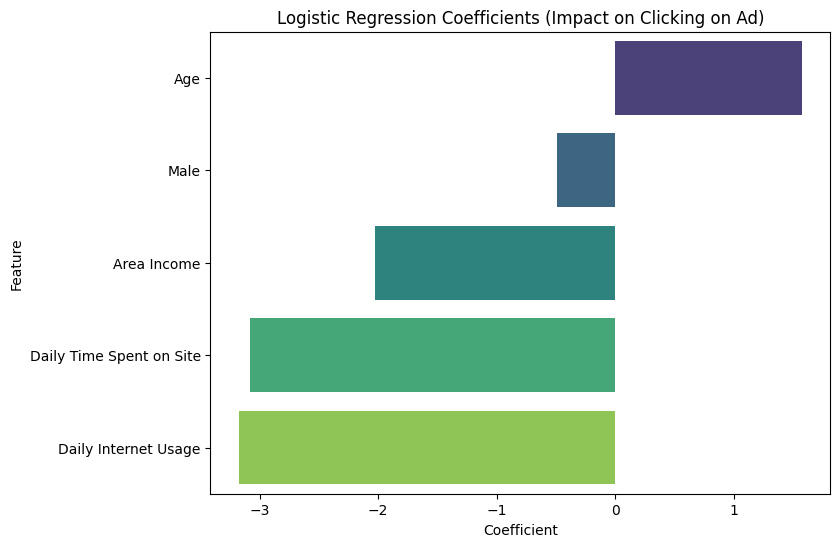

In [9]:
# Get the model coefficients and feature names
coefficients = result.params[1:]  # Exclude constant
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

# Create a DataFrame of coefficients for better readability
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualize the coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients (Impact on Clicking on Ad)')
plt.show()
